In [7]:
import datetime
from datetime import date
import functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv("data/combineddata.csv")
df = functions.filter(df)
df = functions.clean(df)
df = functions.group_west_east(df)
df = functions.group_dates_seasons(df)
df_categorical, df_numerical = functions.separate_cat_num(df)

In [9]:
df.head(5)

,station,train_name,final_destination_station,delay_in_min,time,is_canceled,train_type,train_line_ride_id,former,year,month,day,season
0,Aachen Hbf,RE 9,Aachen Hbf,0,2024-07-01 00:41:00,False,RE,-1701587498056121817-2406302210,West,2024,7,1,Summer
1,Aachen Hbf,RB 20,Aachen-Rothe Erde,3,2024-07-01 00:04:00,False,RB,1573967790757085557-2406302312,West,2024,7,1,Summer
2,Aachen Hbf,RE 1,Aachen Hbf,12,2024-07-01 00:19:00,False,RE,7157250219775883918-2406302120,West,2024,7,1,Summer
3,Aachen Hbf,RB 33,Aachen Hbf,2,2024-07-01 00:29:00,False,RB,3877311608492123870-2406302216,West,2024,7,1,Summer
4,Aachen Hbf,RE 18,Heerlen,1,2024-07-01 00:18:00,False,RE,349781417030375472-2407010017,West,2024,7,1,Summer


# Univariate Analysis

## Categorical Variables

In [10]:
df_categorical.columns

Index(['station', 'train_name', 'final_destination_station', 'time',
       'train_type', 'train_line_ride_id', 'former', 'season', 'year', 'month',
       'day'],
      dtype='object')

In [11]:
station_frequency = df["station"].value_counts()
station_proportion = df["station"].value_counts(normalize=True)

station_frequency, station_proportion

(station
 München Hbf                      688997
 Hamburg Hbf                      657275
 Frankfurt(Main)Hbf               629101
 Berlin Friedrichstraße           621180
 Berlin Südkreuz                  551302
                                   ...  
 Rosenheim                         18288
 Gießen                            17749
 Heilbronn Hbf                     16142
 Lüneburg                          16096
 Düsseldorf Flughafen Terminal     15443
 Name: count, Length: 110, dtype: int64,
 station
 München Hbf                      0.033375
 Hamburg Hbf                      0.031839
 Frankfurt(Main)Hbf               0.030474
 Berlin Friedrichstraße           0.030090
 Berlin Südkreuz                  0.026705
                                    ...   
 Rosenheim                        0.000886
 Gießen                           0.000860
 Heilbronn Hbf                    0.000782
 Lüneburg                         0.000780
 Düsseldorf Flughafen Terminal    0.000748
 Name: proportion

In [17]:
station_frequency[:30]

station
München Hbf                   688997
Hamburg Hbf                   657275
Frankfurt(Main)Hbf            629101
Berlin Friedrichstraße        621180
Berlin Südkreuz               551302
Berlin Hbf                    523037
Berlin Ostkreuz               519711
Berlin Ostbahnhof             474031
Berlin Gesundbrunnen          468825
Köln Hbf                      452695
Stuttgart Hbf                 444217
Nürnberg Hbf                  443472
Hamburg-Altona                433231
Köln Messe/Deutz              401639
München Ost                   394579
München-Pasing                388229
Berlin Zoologischer Garten    375674
Düsseldorf Hbf                373011
Berlin-Lichtenberg            372452
Leipzig Hbf                   366577
Berlin Potsdamer Platz        355241
Dortmund Hbf                  351788
Karlsruhe Hbf                 317664
Essen Hbf                     313410
Hannover Hbf                  277160
Hamburg Dammtor               264652
Berlin-Wannsee                

/var/folders/3j/f7d6p9t136x34vdmdy30wrrc0000gn/T/ipykernel_24235/1242806860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_frequency[:30].index, y=station_frequency[:30].values , palette="Set3")


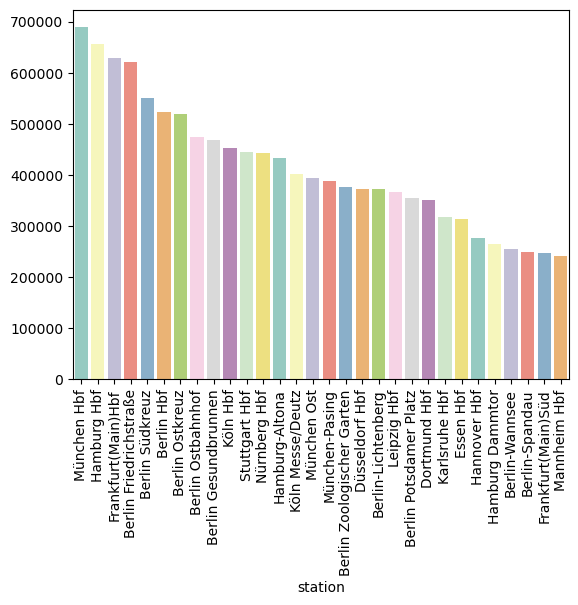

In [18]:
sns.barplot(x=station_frequency[:30].index, y=station_frequency[:30].values , palette="Set3")
plt.xticks(rotation=90)
plt.show();